In [150]:
# imports
import numpy as np
import pandas as pd
import polars as pl
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import json
import seaborn as sns
from rich import print
import time
from numba import njit

load_dotenv()


In [153]:
RAW_DATA_DIR = Path(os.getenv('RAW_DATA_DIR'))
PROCESSED_DATA_DIR = Path(os.getenv('PROCESSED_DATA_DIR'))
RANDOM_SEED = 42

In [36]:
views_df = pl.read_parquet(PROCESSED_DATA_DIR / 'pageviews_all.parquet')
info_df = pl.read_parquet(PROCESSED_DATA_DIR / 'people_data_all.parquet')

In [37]:
views_df

shape: (1_976_658, 105)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ title                  ‚îÜ 2015-05 ‚îÜ 2015-06 ‚îÜ 2015-07 ‚îÜ ‚Ä¶ ‚îÜ 2023-09 ‚îÜ 2023-10 ‚îÜ 2023-11 ‚îÜ 2023-12 ‚îÇ
‚îÇ ---                    ‚îÜ ---     ‚îÜ ---     ‚îÜ ---     ‚îÜ   ‚îÜ ---     ‚îÜ ---     ‚îÜ ---     ‚îÜ ---     ‚îÇ
‚îÇ str                    ‚îÜ i64     ‚îÜ i64     ‚îÜ i64     ‚îÜ   ‚îÜ i64     ‚îÜ i64     ‚îÜ i64     ‚îÜ i64     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Neophyte_II_of_Ungro-W ‚îÜ null    ‚îÜ null    ‚îÜ null    ‚îÜ ‚Ä¶ ‚îÜ 29      ‚îÜ 44      ‚îÜ 23      ‚îÜ 25      ‚îÇ
‚îÇ allachia               ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ         ‚îÇ
‚îÇ Olivia_Giovetti        ‚îÜ 26      ‚îÜ 34      ‚îÜ 52      ‚îÜ ‚Ä¶ ‚îÜ 20      ‚îÜ 59      ‚îÜ 41      ‚îÜ 19      ‚îÇ
‚îÇ Alexander_Grant_McLean ‚îÜ 9       ‚îÜ 48      ‚îÜ 24      ‚îÜ ‚Ä¶ ‚îÜ 9       ‚îÜ 10      ‚îÜ 1       ‚îÜ 5       ‚îÇ
‚îÇ Bernard_H._Raether     ‚îÜ 17      ‚îÜ 16      ‚îÜ 21      ‚îÜ ‚Ä¶ ‚îÜ 2       ‚îÜ null    ‚îÜ 1       ‚îÜ 2       ‚îÇ
‚îÇ Leigh_Magar            ‚îÜ 47      ‚îÜ 46      ‚îÜ 64      ‚îÜ ‚Ä¶ ‚îÜ 8       ‚îÜ 5       ‚îÜ 10      ‚îÜ 2       ‚îÇ
‚îÇ ‚Ä¶                      ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÇ
‚îÇ Edgar_Dibden           ‚îÜ null    ‚îÜ null    ‚îÜ null    ‚îÜ ‚Ä¶ ‚îÜ 6       ‚îÜ 7       ‚îÜ 4       ‚îÜ 2       ‚îÇ
‚îÇ David_Mulready         ‚îÜ 56      ‚îÜ 51      ‚îÜ 78      ‚îÜ ‚Ä¶ ‚îÜ 14      ‚îÜ 14      ‚îÜ 7       ‚îÜ 6       ‚îÇ
‚îÇ Bruno_Riem             ‚îÜ 40      ‚îÜ 29      ‚îÜ 34      ‚îÜ ‚Ä¶ ‚îÜ 3       ‚îÜ 3       ‚îÜ 1       ‚îÜ 2       ‚îÇ
‚îÇ Bon_Spence             ‚îÜ 23      ‚îÜ 52      ‚îÜ 38      ‚îÜ ‚Ä¶ ‚îÜ 10      ‚îÜ 8       ‚îÜ 7       ‚îÜ 6       ‚îÇ
‚îÇ John_Bain_(footballer, ‚îÜ null    ‚îÜ null    ‚îÜ null    ‚îÜ ‚Ä¶ ‚îÜ 5       ‚îÜ 16      ‚îÜ 8       ‚îÜ 7       ‚îÇ
‚îÇ _born_1923‚Ä¶            ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ   ‚îÜ         ‚îÜ         ‚îÜ         ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [38]:
info_df

shape: (1_572_844, 33)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ wikidata_co ‚îÜ birth ‚îÜ death ‚îÜ gender ‚îÜ ‚Ä¶ ‚îÜ count_count ‚îÜ count_educa ‚îÜ count_occup ‚îÜ count_genre ‚îÇ
‚îÇ de          ‚îÜ ---   ‚îÜ ---   ‚îÜ ---    ‚îÜ   ‚îÜ ry_of_citiz ‚îÜ ted_at      ‚îÜ ation       ‚îÜ ---         ‚îÇ
‚îÇ ---         ‚îÜ i64   ‚îÜ i64   ‚îÜ str    ‚îÜ   ‚îÜ enship      ‚îÜ ---         ‚îÜ ---         ‚îÜ u32         ‚îÇ
‚îÇ str         ‚îÜ       ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ ---         ‚îÜ u32         ‚îÜ u32         ‚îÜ             ‚îÇ
‚îÇ             ‚îÜ       ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ u32         ‚îÜ             ‚îÜ             ‚îÜ             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Q1000005    ‚îÜ 1860  ‚îÜ 1927  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 0           ‚îÜ 4           ‚îÜ 0           ‚îÇ
‚îÇ Q100005     ‚îÜ 1922  ‚îÜ 1951  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 1           ‚îÜ 5           ‚îÜ 0           ‚îÇ
‚îÇ Q1000051    ‚îÜ 1884  ‚îÜ 1962  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 2           ‚îÜ 3           ‚îÜ 0           ‚îÇ
‚îÇ Q1000053    ‚îÜ 1962  ‚îÜ null  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 2           ‚îÜ 1           ‚îÜ 2           ‚îÜ 0           ‚îÇ
‚îÇ Q1000061    ‚îÜ 1940  ‚îÜ null  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 1           ‚îÜ 2           ‚îÜ 0           ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ Q999994     ‚îÜ 1988  ‚îÜ null  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 0           ‚îÜ 1           ‚îÜ 0           ‚îÇ
‚îÇ Q999995     ‚îÜ 1987  ‚îÜ null  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 0           ‚îÜ 1           ‚îÜ 0           ‚îÇ
‚îÇ Q999997     ‚îÜ 1984  ‚îÜ null  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 0           ‚îÜ 2           ‚îÜ 0           ‚îÇ
‚îÇ Q999998     ‚îÜ 1952  ‚îÜ null  ‚îÜ Male   ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 0           ‚îÜ 1           ‚îÜ 0           ‚îÇ
‚îÇ Q999999     ‚îÜ 1982  ‚îÜ null  ‚îÜ Female ‚îÜ ‚Ä¶ ‚îÜ 1           ‚îÜ 0           ‚îÜ 1           ‚îÜ 0           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [39]:
info_df['level2_main_occ'].value_counts()

shape: (15, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ level2_main_occ         ‚îÜ count  ‚îÇ
‚îÇ ---                     ‚îÜ ---    ‚îÇ
‚îÇ str                     ‚îÜ u32    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Family                  ‚îÜ 8325   ‚îÇ
‚îÇ Worker/Business (small) ‚îÜ 12795  ‚îÇ
‚îÇ Culture-core            ‚îÜ 380896 ‚îÇ
‚îÇ Military                ‚îÜ 47350  ‚îÇ
‚îÇ Religious               ‚îÜ 45481  ‚îÇ
‚îÇ ‚Ä¶                       ‚îÜ ‚Ä¶      ‚îÇ
‚îÇ Sports/Games            ‚îÜ 525584 ‚îÇ
‚îÇ Politics                ‚îÜ 204040 ‚îÇ
‚îÇ Administration/Law      ‚îÜ 48954  ‚îÇ
‚îÇ Culture-periphery       ‚îÜ 57818  ‚îÇ
‚îÇ Academia                ‚îÜ 148053 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [154]:
X = views_df.filter(pl.col('title').is_in(info_df.filter(pl.col('level2_main_occ') == 'Politics').select('name'))).drop('title').drop_nulls().to_numpy()
rng = np.random.default_rng(RANDOM_SEED)
rng.shuffle(X)
X.shape

(132153, 104)

In [41]:
from pyts.approximation import SymbolicAggregateApproximation, SymbolicFourierApproximation, PiecewiseAggregateApproximation
from pyts.decomposition import SingularSpectrumAnalysis

In [171]:
sax_transformer = SymbolicAggregateApproximation(n_bins=2, alphabet='ordinal', strategy='uniform')
X_sax = sax_transformer.transform(X)

pax_transformer = PiecewiseAggregateApproximation(window_size=12, overlapping=False)
X_pax = pax_transformer.transform(X)

ssa_transformer = SingularSpectrumAnalysis(window_size=12, groups='auto')
X_trend, X_seasonal, X_residual = ssa_transformer.fit_transform(X).transpose(1, 0, 2)

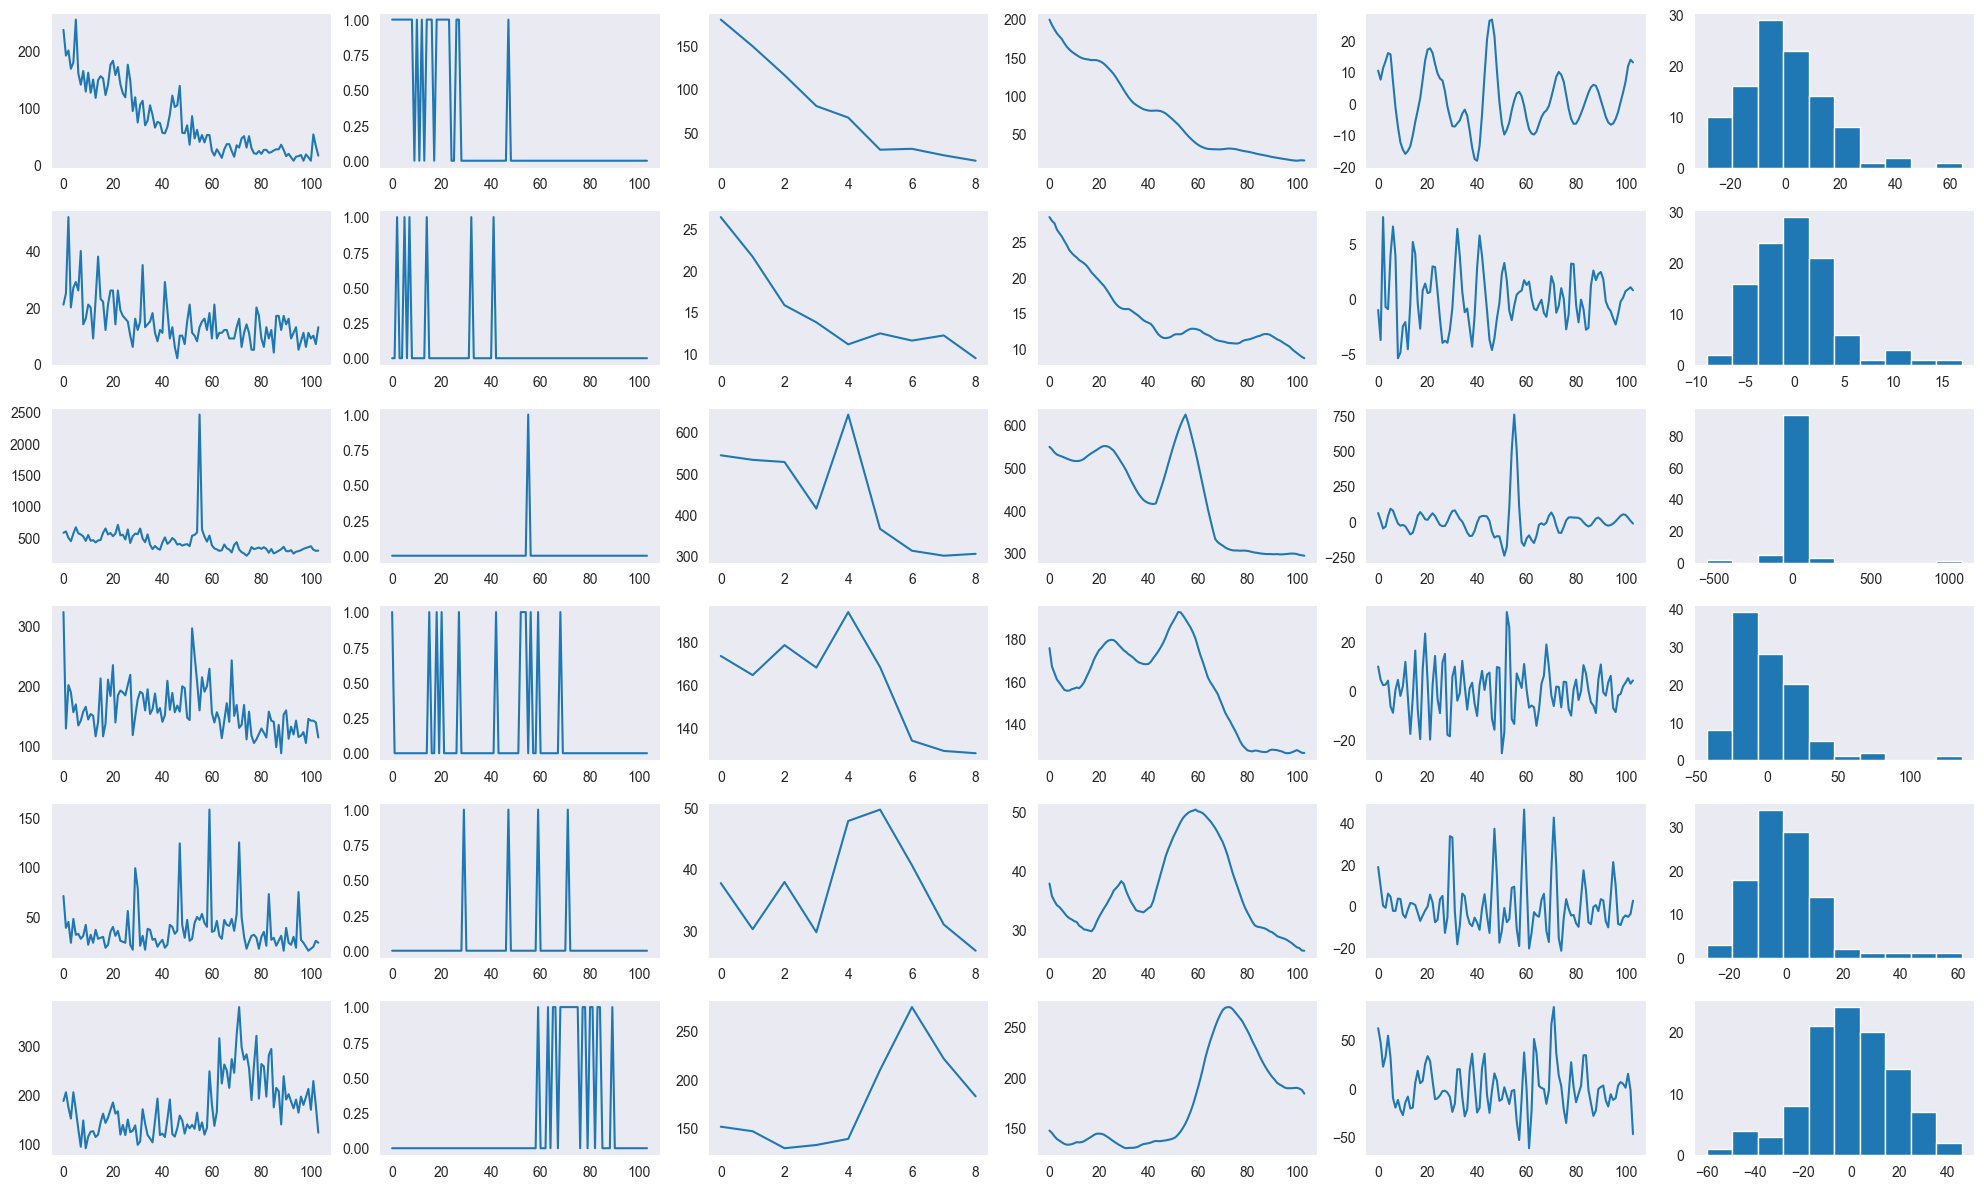

In [174]:
n_to_plot = 6

# rng = np.random.default_rng(RANDOM_SEED)
# sample_idx = rng.integers(0, len(X), n_to_plot)
# sample_idx = [ 11794, 102280,  86503,  57999,  57224] 
sample_idx = np.arange(n_to_plot)

fig, axs = plt.subplots(n_to_plot, 6, figsize=(20, n_to_plot * 2))

all_X = zip(X[sample_idx], X_sax[sample_idx], X_pax[sample_idx], X_trend[sample_idx], X_seasonal[sample_idx], X_residual[sample_idx])
for (x, x_sax, x_pax, x_trend, x_seasonal, x_residual), ax in zip(all_X, axs):
    ax[0].plot(x)
    ax[1].plot(x_sax)
    ax[2].plot(x_pax)
    ax[3].plot(x_trend)
    ax[4].plot(x_seasonal)
    ax[5].hist(x_residual)

plt.tight_layout()
plt.show()

One-hit wonder, nostalgia

In [143]:
@njit
def count_clusters(x_sax: np.ndarray, d: int):
    if x_sax.ndim != 1:
        raise ValueError('array must be 1d')
    nonzero_count = np.count_nonzero(x_sax) 
    if nonzero_count in (0, 1):
        return nonzero_count

    # Calculate the difference between consecutive indices where 1s occur
    diff = np.diff(np.where(x_sax)[0])

    # Count the number of clusters by checking where the difference is greater than d
    num_clusters = np.sum(diff > d)

    # Add 1 to account for the last cluster
    num_clusters += 1 if len(diff) > 0 else 0

    return num_clusters


def count_clusters_2d(X_sax: np.ndarray, d: int):
    return np.apply_along_axis(count_clusters, d=d, arr=X_sax, axis=1).reshape(-1, 1)

Seasonality

In [186]:
from sktime.param_est.seasonality import SeasonalityACF
from sktime.transformations.series.difference import Differencer

def find_seasonality(x: np.ndarray, d, fitter):
    if x.ndim != 1:
        raise ValueError('array must be 1d')
    fitter.fit(x)
    significant_sp = fitter.get_fitted_params()['sp_significant']
    if len(significant_sp) > 0:
        sp_idx = np.argwhere(np.array(significant_sp) > d)
        if len(sp_idx) > 0:
            return significant_sp[sp_idx]
    return None

def find_seasonality_2d(X: np.ndarray, d):
    fitter = Differencer() * SeasonalityACF()
    return np.apply_along_axis(find_seasonality, d=d, fitter=fitter, arr=X, axis=1).reshape(-1, 1)

In [187]:
find_seasonality_2d(X[:50], 3)

array([[None],
       [None],
       [None],
       [None],
       [12],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [12],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [12],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None]], dtype=object)

In [162]:
nobs = len(X[1])
nlags = min(10 * np.log10(nobs), nobs - 1)
print(nlags)

20.170333392987803

Linear trend

In [19]:
from scipy import stats
def regression(x: np.ndarray):
    x = (x - x.mean()) / x.std()
    m = len(x) - 1
    x_range = np.arange(len(x))
    x_range_mean = m / 2
    slope = (x - x.mean()).dot(x_range - x_range_mean) / (m * np.var(x_range))
    intercept =  x.mean() - slope * x_range_mean
    residuals = x - (slope * x_range + intercept)
    rss = np.sum(np.square(residuals))
    tss =  np.sum(np.square(x - x.mean()))
    r2 = 1 - rss / tss
    # pvalue calculation
    se = x.std() / np.sqrt(np.sum(np.square(x_range - x_range_mean)))
    
    stat = slope / se 
    print(stat)
    pv = 2 * (1 - stats.t.cdf(np.abs(stat), m))
    return slope, intercept, r2, pv

In [20]:
# test
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
slope, intercept, r2, pv = regression(x)
print(slope, intercept, r2, pv)

3.5136418446315325
0.3868392354571063 -1.7407765595569784 0.9876543209876544 0.006580848999838018


In [22]:
def simple_linear_regression_per_row(X):
    # TEST THIS
    # Create an array representing the time points (independent variable)
    time_points = np.arange(X.shape[1])

    # Calculate the mean of each row and the mean of the time points
    row_means = np.mean(X, axis=1)
    time_mean = np.mean(time_points)

    # Calculate the numerator and denominator for each row
    numerator = np.sum((time_points - time_mean)
                       [:, np.newaxis] * (X - row_means[:, np.newaxis]), axis=1)
    denominator = np.sum((time_points - time_mean) ** 2)

    # Calculate the slopes
    slopes = numerator / denominator

    # Calculate the intercepts
    intercepts = row_means - slopes * time_mean

    # Calculate the predicted values for each row
    y_preds = intercepts[:, np.newaxis] + slopes[:, np.newaxis] * time_points

    # Calculate the residual sum of squares (RSS) for each row
    rss = np.sum((X - y_preds) ** 2, axis=1)

    # Calculate the total sum of squares (TSS) for each row
    tss = np.sum((X - row_means[:, np.newaxis]) ** 2, axis=1)

    # Calculate R-squared for each row
    r_squared_values = 1 - (rss / tss)

    # Calculate the standard error of the slope for each row
    n = X.shape[1]
    standard_errors = np.sqrt(rss / (n - 2)) / \
        np.sqrt(np.sum((time_points - time_mean) ** 2))

    # Calculate t-values for each row
    t_values = slopes / standard_errors

    # Calculate p-values for each row
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=n - 2))

    return slopes, intercepts, r_squared_values, p_values

In [29]:
simple_linear_regression_per_row(np.array(np.expand_dims(x, 0)))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [212]:
for x in X[:50]:
    print(regression(x))

(-0.03010493834276493, 1.5504043246523938, 0.8011015911637434)

(-0.01897606390969271, 0.9772672913491747, 0.3182910148156459)

(-0.012733664995486853, 0.6557837472675729, 0.14332400987244864)

(-0.014027804048383424, 0.7224319084917467, 0.17393680627269292)

(-0.0018341136686731948, 0.0944568539366697, 0.002973477147361847)

(0.01698832842949721, -0.874898914119106, 0.25510173193041863)

(-0.022713044970252245, 1.1697218159679905, 0.45599788858314894)

(-0.026818121834907397, 1.381133274497731, 0.6357243246146029)

(0.00847242425360887, -0.4363298490608567, 0.0634493971002471)

(-0.0046620953195800775, 0.24009790895837405, 0.01921208093854332)

(-0.017694481826093053, 0.9112658140437924, 0.27675011392142235)

(-0.02151990172821378, 1.1082749390030096, 0.40934800460296716)

(-0.0013009498891910914, 0.06699891929334126, 0.001496005696015601)

(-0.023462288538056014, 1.2083078597098846, 0.4865784302928453)

(-0.021437569700024868, 1.1040348395512807, 0.4062217839046476)

(-0.006662565841994523, 0.34312214086271803, 0.03923694069027861)

(-0.007424535257559357, 0.38236356576430686, 0.048724866526668076)

(-0.027555887619364724, 1.4191282123972833, 0.671182956786988)

(-0.018693986405323028, 0.9627402998741357, 0.3088986108528953)

(-0.02340709743024978, 1.2054655176578637, 0.4842919340847497)

(-0.016628879079175048, 0.8563872725775151, 0.2444207434147624)

(-0.014590572860232966, 0.7514145023019979, 0.18817277844875258)

(-0.006267562000308429, 0.3227794430158841, 0.03472237217476781)

(-0.02463408681761357, 1.2686554711070985, 0.5363954009149379)

(-0.022604692265312684, 1.1641416516636032, 0.45165758522618393)

(-0.01917386083306503, 0.987453832902849, 0.3249610070433967)

(-0.012193360822042846, 0.6279580823352066, 0.13141924298145002)

(-0.004030245990725845, 0.207557668522381, 0.01435738080395177)

(-0.004768517479953884, 0.245578650217625, 0.020099204461396236)

(-0.009647127369040052, 0.49682705950556266, 0.08226368032050835)

(-0.01542178933560719, 0.7942221507837701, 0.21022368414117676)

(-0.007619316960530633, 0.3923948234673275, 0.051314983198069486)

(-0.02527499213755127, 1.3016620950838902, 0.5646692894798464)

(-0.018253282009532464, 0.9400440234909219, 0.29450592559564737)

(-0.020577452276601647, 1.059738792244985, 0.37427887591544307)

(-0.007371589768775456, 0.379636873091936, 0.048032415498259096)

(-0.0014200959054562476, 0.07313493913099678, 0.0017825735603484993)

(-0.017042160471325896, 0.8776712642732836, 0.2567210089458456)

(-0.017135470841878504, 0.8824767483567431, 0.25953993695512845)

(-0.006783257179188972, 0.34933774472823204, 0.04067135827238222)

(0.004976282471757809, -0.25627854729552724, 0.021888810388344337)

(-0.016930790027065584, 0.8719356863938775, 0.2533766311715433)

(-0.011072968523375066, 0.5702578789538159, 0.1083777775557121)

(-0.018002401118659535, 0.9271236576109658, 0.2864659304622772)

(0.008567546293852424, -0.44122863413339997, 0.06488211968426394)

(-0.01865646662141898, 0.9608080310030773, 0.3076599046500035)

(-0.022768354004237688, 1.172570231218241, 0.45822141348832546)

(-0.025654927075211373, 1.3212287443733857, 0.5817731572070339)

(-0.020811843856726523, 1.071809958621416, 0.38285403444904287)

(-0.004634285164734024, 0.23866568598380214, 0.01898355820650166)

In [199]:
regression(np.array([1, 2, 3, 4, 5, 6, 7]))

(1.1666666666666667, 0.5, 0.9722222222222222)

In [323]:
(pl.DataFrame(X_sax[[11794, 102280,  86503,  57999,  57224]]).with_row_index()
 .melt('index')
 .group_by('index')
 .agg(num_peaks=pl.col('value').ts.number_peaks(12))
 .sort('index')
)


shape: (5, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ index ‚îÜ num_peaks ‚îÇ
‚îÇ ---   ‚îÜ ---       ‚îÇ
‚îÇ u32   ‚îÜ u32       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0     ‚îÜ 0         ‚îÇ
‚îÇ 1     ‚îÜ 0         ‚îÇ
‚îÇ 2     ‚îÜ 2         ‚îÇ
‚îÇ 3     ‚îÜ 1         ‚îÇ
‚îÇ 4     ‚îÜ 0         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [89]:
np.diff(np.where(X_sax[57999])[0])

array([ 1,  1,  1,  1,  8, 10,  7, 18, 39], dtype=int64)

In [332]:
import numpy as np
from numpy.polynomial import Polynomial

In [341]:
np.polyfit(np.arange(len(X_sax)), X_sax, deg=1).shape

(2, 104)

In [ ]:
# count number of "0" between "1" in X

def count_zeros_between_ones(X):
    return np.array(
        [np.diff(
            np.where(
                np.concatenate(([0], x, [0])))[0])[::2] for x in X
         ]
        )

In [343]:
# calculate linear coefficient and r2 for each row in X
def calculate_linear_coefficients(X):
    n = X.shape[1]
    coefficients = np.zeros((X.shape[0], n))
    r2 = np.zeros((X.shape[0], n))
    for i in range(X.shape[0]):
        for j in range(n):
            p = Polynomial.fit(np.arange(len(X[i])), X[i], deg=1)
            coefficients[i, j] = p.convert().coef[0]
            r2[i, j] = p.convert().coef[1]
    return coefficients, r2

coefficients, r2 = calculate_linear_coefficients(X_sax)

: 

In [312]:
X_sax[57999]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [220]:
np.apply_along_axis(len, 1, axs)

array([6, 6, 6, 6, 6])

In [168]:
(views_df.filter(pl.col('title').is_in(info_df.filter(pl.col('level2_main_occ') == 'Politics').select('name')))
 .melt('title')
 .group_by('title')
 .agg(linear_trend=pl.col('value').ts.linear_trend())
 .unnest('linear_trend')
)

shape: (195_748, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ title                     ‚îÜ slope     ‚îÜ intercept   ‚îÜ rss           ‚îÇ
‚îÇ ---                       ‚îÜ ---       ‚îÜ ---         ‚îÜ ---           ‚îÇ
‚îÇ str                       ‚îÜ f64       ‚îÜ f64         ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ John_Shurley_(died_1631)  ‚îÜ -0.132055 ‚îÜ 25.483516   ‚îÜ 37942.020084  ‚îÇ
‚îÇ Kazimierz_Karwowski       ‚îÜ -0.358231 ‚îÜ 35.448901   ‚îÜ 7230.644924   ‚îÇ
‚îÇ H._B._Ari_Gowder          ‚îÜ -0.383548 ‚îÜ 47.348901   ‚îÜ 45818.470234  ‚îÇ
‚îÇ Hiroyuki_Tani             ‚îÜ -0.122527 ‚îÜ 27.839011   ‚îÜ 618696.746703 ‚îÇ
‚îÇ Raashid_Alvi              ‚îÜ -2.222234 ‚îÜ 329.82967   ‚îÜ 7.4868e6      ‚îÇ
‚îÇ ‚Ä¶                         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶             ‚îÇ
‚îÇ John_Easton_Mills         ‚îÜ -0.342292 ‚îÜ 55.57033    ‚îÜ 16411.909591  ‚îÇ
‚îÇ Psammetichus_IV           ‚îÜ 0.119722  ‚îÜ 89.517033   ‚îÜ 41639.073578  ‚îÇ
‚îÇ Rosa_Valenzuela_Rodelo    ‚îÜ -0.236648 ‚îÜ 29.43979    ‚îÜ 7737.81983    ‚îÇ
‚îÇ Christian_Henrik_Arendrup ‚îÜ -0.258653 ‚îÜ 45.022527   ‚îÜ 20735.117428  ‚îÇ
‚îÇ Sayuri_Fujita             ‚îÜ 0.000432  ‚îÜ 1229.987363 ‚îÜ 8.1528e7      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [108]:
pl.DataFrame(X_sax[0])

shape: (104, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ column_0 ‚îÇ
‚îÇ ---      ‚îÇ
‚îÇ i64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 5665     ‚îÇ
‚îÇ 2932     ‚îÇ
‚îÇ 2420     ‚îÇ
‚îÇ 2482     ‚îÇ
‚îÇ 3097     ‚îÇ
‚îÇ ‚Ä¶        ‚îÇ
‚îÇ 1026     ‚îÇ
‚îÇ 1335     ‚îÇ
‚îÇ 5767     ‚îÇ
‚îÇ 2327     ‚îÇ
‚îÇ 3310     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [107]:
import polars as pl
import numpy as np
from functime.feature_extractors import FeatureExtractor, binned_entropy

# Load commodities price data
y = pl.read_parquet(
    "https://github.com/functime-org/functime/raw/main/data/commodities.parquet")

# Get column names ("commodity_type", "time", "price")
entity_col, time_col, value_col = y.columns

# Extract a single feature from a single time-series
binned_entropy = binned_entropy(
    pl.Series(np.random.normal(0, 1, size=10)),
    bin_count=10
)

# üî• Also works on LazyFrames with query optimization
features = (
    pl.LazyFrame({
        "index": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
        "value": np.random.normal(0, 1, size=10)
    })
    .select(
        binned_entropy=pl.col("value").ts.binned_entropy(bin_count=10),
        cusum=pl.col('value').ts.cusum(10, 10),
        lempel_ziv_complexity=pl.col(
            "value").ts.lempel_ziv_complexity(threshold=3),
        longest_streak_above_mean=pl.col(
            "value").ts.longest_streak_above_mean(),
    )
    .collect()
)

# üöÑ Extract features blazingly fast on many
# stacked time-series using `group_by`
features = (
    y.group_by(entity_col)
    .agg(
        binned_entropy=pl.col(value_col).ts.binned_entropy(bin_count=10),
        lempel_ziv_complexity=pl.col(
            value_col).ts.lempel_ziv_complexity(threshold=3),
        longest_streak_above_mean=pl.col(
            value_col).ts.longest_streak_above_mean(),
    )
)

# üöÑ Extract features blazingly fast on windows
# of many time-series using `group_by_dynamic`
features = (
    # Compute rolling features at yearly intervals
    y.group_by_dynamic(
        time_col,
        every="12mo",
        by=entity_col,
    )
    .agg(
        binned_entropy=pl.col(value_col).ts.binned_entropy(bin_count=10),
        lempel_ziv_complexity=pl.col(
            value_col).ts.lempel_ziv_complexity(threshold=3),
        longest_streak_above_mean=pl.col(
            value_col).ts.longest_streak_above_mean(),
    )
)

features

C:\Users\netan\AppData\Local\Temp\ipykernel_12268\2558532157.py:52: DeprecationWarning: `the argument by` for `group_by_dynamic` is deprecated. It has been renamed to `group_by`.
  y.group_by_dynamic(


shape: (4_021, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ commodity_type ‚îÜ time         ‚îÜ binned_entropy ‚îÜ lempel_ziv_complexity  ‚îÜ longest_streak_above_m ‚îÇ
‚îÇ ---            ‚îÜ ---          ‚îÜ ---            ‚îÜ ---                    ‚îÜ ean                    ‚îÇ
‚îÇ str            ‚îÜ datetime[ns] ‚îÜ f64            ‚îÜ f64                    ‚îÜ ---                    ‚îÇ
‚îÇ                ‚îÜ              ‚îÜ                ‚îÜ                        ‚îÜ i32                    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Aluminum       ‚îÜ 1960-01-01   ‚îÜ 0.0            ‚îÜ 0.333333               ‚îÜ 0                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Aluminum       ‚îÜ 1961-01-01   ‚îÜ 0.0            ‚îÜ 0.333333               ‚îÜ 0                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Aluminum       ‚îÜ 1962-01-01   ‚îÜ 0.566086       ‚îÜ 0.333333               ‚îÜ 2                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Aluminum       ‚îÜ 1963-01-01   ‚îÜ 0.562335       ‚îÜ 0.333333               ‚îÜ 3                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Aluminum       ‚îÜ 1964-01-01   ‚îÜ 0.983088       ‚îÜ 0.333333               ‚îÜ 9                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶                      ‚îÜ ‚Ä¶                      ‚îÇ
‚îÇ Zinc           ‚îÜ 2019-01-01   ‚îÜ 1.820076       ‚îÜ 0.333333               ‚îÜ 6                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Zinc           ‚îÜ 2020-01-01   ‚îÜ 1.979205       ‚îÜ 0.333333               ‚îÜ 5                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Zinc           ‚îÜ 2021-01-01   ‚îÜ 1.748155       ‚îÜ 0.333333               ‚îÜ 4                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Zinc           ‚îÜ 2022-01-01   ‚îÜ 1.632631       ‚îÜ 0.333333               ‚îÜ 6                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îÇ Zinc           ‚îÜ 2023-01-01   ‚îÜ 1.098612       ‚îÜ 0.666667               ‚îÜ 1                      ‚îÇ
‚îÇ                ‚îÜ 00:00:00     ‚îÜ                ‚îÜ                        ‚îÜ                        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [161]:
y.group_by('commodity_type').agg(trend=pl.col('time').ts.linear_trend())

shape: (71, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ commodity_type       ‚îÜ trend                            ‚îÇ
‚îÇ ---                  ‚îÜ ---                              ‚îÇ
‚îÇ str                  ‚îÜ struct[3]                        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Copper               ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îÇ Logs, Cameroon       ‚îÜ {2.6298e15,-7.2523e13,2.2912e30} ‚îÇ
‚îÇ Rice, Viet Namese 5% ‚îÜ {2.7459e15,1.0811e18,1.2182e34}  ‚îÇ
‚îÇ Sawnwood, Malaysian  ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îÇ Zinc                 ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îÇ ‚Ä¶                    ‚îÜ ‚Ä¶                                ‚îÇ
‚îÇ Sawnwood, Cameroon   ‚îÜ {3.2537e15,4.9819e17,5.3166e36}  ‚îÇ
‚îÇ Urea                 ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îÇ Crude oil, average   ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îÇ Chicken              ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îÇ Sugar, US            ‚îÜ {2.6298e15,-3.1565e17,2.7060e30} ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

----

## Patterns

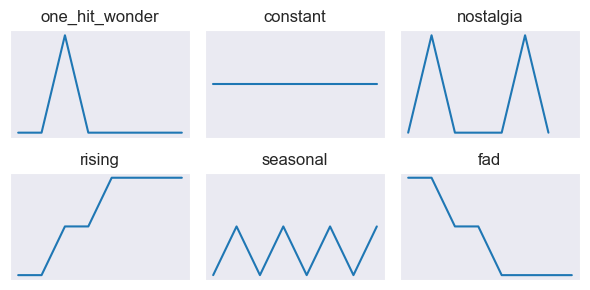

In [34]:
import seaborn as sns
patterns = {
    'one_hit_wonder': [0, 0, 2, 0, 0, 0, 0, 0],
    'constant': [1, 1, 1, 1, 1, 1, 1, 1],
    'nostalgia': [0, 2, 0, 0, 0, 2, 0],
    'rising': [0, 0, 1, 1, 2, 2, 2, 2],
    'seasonal': [0, 1, 0, 1, 0, 1, 0, 1],
    'fad': [2, 2, 1, 1, 0, 0, 0, 0],
    
}

fig, axs = plt.subplots(2, len(patterns) // 2, figsize=(len(patterns), 3), sharex=True, sharey=True)
for (name, pattern), ax in zip(patterns.items(), axs.ravel()):
    sns.lineplot(pattern, ax=ax)
    ax.set(title=name, xticklabels='', yticklabels='')
plt.tight_layout()
plt.show()

```
x_sax = sax(x)
if number of peaks in X_sax == 1:
    classify x as one_hit_wonder
else if number of peaks in X_sax == 2:
    classify x as nostalgia
else:
    find seasonality
    else:
        if linear regression pvalue < 0.5>:
            if linear slope < 0:
                classify x as fad
            else if linear slope > 0:
                classify as rising
        else:
            classify as constant


```